$\qquad$ $\qquad$$\qquad$  **TDA 232 Machine Learning: Home Assignment 3 -- Classification (20 points)** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-Nearest-Neighbour (Y), Naive-bayes Classifier (D), Support Vector Machine (D), Logistic Regression (Y)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Yuchong (Y), Divya (D)** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 6th May** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Pontus Havström, 970817-6459, ponhav@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ **&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Qufei Wang, 900212-6952, qufei@student.chalmers.se**


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.



# Theoretical Questions
## 1. K-Nearest-Neighbour Classification (4 pts)
### 1.1 Exercise 1 (2 pts)
A KNN classifier assigns a test instance the majority class associated with its K nearest training instances. Distance between instances is measured using Euclidean distance. Suppose we have the following training set of positive (+) and negative (-) instances and a single test instance (o). All instances are projected onto a vector space of two real-valued features (X and Y). Answer the following questions. Assume “unweighted” KNN (every nearest neighbor contributes equally to the final vote).

![替代文字](https://raw.githubusercontent.com/BruceZHANG6/Imagesforuse/master/knn2.png)

a) What would be the class assigned to this test instance for K=1, K=5, K=7 and why? (**1 pt**)

b) The classification result is affected by the increasing K, so what will be the maxinum value of K you think in this case? Why? (**1 pt**)
(**Hint: After K reaches a certain value, the classification result will not change. Find the value!**)


### Your answer here:
**a)** From the graph, it can easily be distinguished that the 3 nearest neighbors to the test instance is of the negative class (-). Furthermore, it is seen that the next four nearest neighbors (4-7 nearest from the test instance) is of the positive class (+). Since the nearest neighbors are unweighted, we can simply count the number of instances from each class for the K nearest neighbors. As such, the majority classes of the K nearest neighbors in each case is 

K = 1 $\implies$ $\mathrm{majority}_{+,-}\{- \} = -$ 

K = 5 $\implies$ $\mathrm{majority}_{+,-}\{ -, -, -, +, + \} = -$

K = 7 $\implies$ $\mathrm{majority}_{+,-}\{ -, -, -, +, +, +, + \} = +$

Answer: The test instance would be assigned to class (-) for K = 1, (-) for K = 5 and (+) for K = 7 as explained above.

**b)** For K = 11, we see that the majority class for the test instance is (-), as there in this case are 6 training instances of class (-) and 5 training instances of class (+). This is visualized in the following figure, where all 11 nearest training instances have Euclidian distances smaller than the radius of the red circle.

![img](https://i.imgur.com/I2FHBtU.png)

Training points at distances larger than the radius of the circle are all of class (+). As such, for K = 12, one more (+) is added to the nearest training instances. Then there are 6 nearest training instances belonging to each class meaning that there is no majority class to determine the classification, resulting in a tie. (We don't consider how a tie is resolved, as the classification result will change in the next step by adding one more to K)

For K = 13, there is then 7 training instances of class (+) and 6 training instances of class (-), meaning that (+) is determined as majority class for the classification of the test instance. Beyond this point, increasing K only adds more training instances of class (+) to the K-nearest-neighbours, which will not change the classification result as we do not consider any weights. This means that K=13 is the maximum value after which the classification will not change

Answer: K=13

### 1.2 Exercise 2 (2 pts)
Consider 5 data points:

$$\{({0},{1}), ({-1},{0})\}∈ Class1,$$ 

$$\{({1},{0}), ({0},{-1}), (-\frac{1}{2}, \frac{1}{2})\}∈ Class2.$$

Consider two test data points:

$$(-\frac{3}{4}, \frac{3}{4})∈ Class1, (\frac{1}{2}, \frac{1}{2})∈ Class2$$

Compute the **probability of error** based on k-nearest neighbor rule when $ K=\{1, 2, 3, 4, 5\}$ and explain why.
(**Hint: The probability of error is the probability of one point is misclassified times the probability of another point is also misclassified**)

### Your answer here:

First of all, we need to calculate the Euclidean distance from the 5 data points to each of the two test data points in order to determine which instances are to be included in each of the K-nearest-neighbor classification cases.

For two dimensional space, the Euclidean distance between two points $\mathbf{p}=(p_1,p_2)$ and $\mathbf{q} = (q_1,q_2)$ is given by
$$d(\mathbf{p},\mathbf{q}) = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2}$$

Denote the training data points as 
$$\{\mathbf{a_1}=(0,1), \mathbf{a_2}=(-1,0)\}\in Class1$$
$$\{\mathbf{b_1}=(1,0), \mathbf{b_2}=(0,-1), \mathbf{b_3}=(-\frac{1}{2},\frac{1}{2})\}\in Class2$$
and the two test data points as
$$\mathbf{\alpha}=(-\frac{3}{4},\frac{3}{4}) \in Class1$$
$$\mathbf{\beta}=(\frac{1}{2},\frac{1}{2}) \in Class2$$

The distances from the test data points to the training data points can now be calculated:
$$d(\mathbf{a_1},\mathbf{\alpha}) = \sqrt{(0+\frac{3}{4})^2 + (1-\frac{3}{4})^2} = \frac{\sqrt{10}}{4}\approx 0.79$$ 
$$d(\mathbf{a_2},\mathbf{\alpha}) = \sqrt{(-1+\frac{3}{4})^2 + (0-\frac{3}{4})^2} = \frac{\sqrt{10}}{4}\approx 0.79$$ 
$$d(\mathbf{b_1},\mathbf{\alpha}) = \sqrt{(1+\frac{3}{4})^2 + (0-\frac{3}{4})^2} = \frac{\sqrt{58}}{4}\approx 1.90$$ 
$$d(\mathbf{b_2},\mathbf{\alpha}) = \sqrt{(0+\frac{3}{4})^2 + (-1-\frac{3}{4})^2} = \frac{\sqrt{58}}{4}\approx 1.90$$ 
$$d(\mathbf{b_3},\mathbf{\alpha}) = \sqrt{(-\frac{1}{2}+\frac{3}{4})^2 + (\frac{1}{2}-\frac{3}{4})^2} = \frac{\sqrt{2}}{4}\approx 0.35$$ 
<br><br>
$$d(\mathbf{a_1},\mathbf{\beta}) = \sqrt{(0-\frac{1}{2})^2 + (1-\frac{1}{2})^2} = \frac{\sqrt{2}}{2}\approx 0.71$$ 
$$d(\mathbf{a_2},\mathbf{\beta}) = \sqrt{(-1-\frac{1}{2})^2 + (0-\frac{1}{2})^2} = \frac{\sqrt{10}}{2}\approx 1.58$$ 
$$d(\mathbf{b_1},\mathbf{\beta}) = \sqrt{(1-\frac{1}{2})^2 + (0-\frac{1}{2})^2} = \frac{\sqrt{2}}{2}\approx 0.71$$ 
$$d(\mathbf{b_2},\mathbf{\beta}) = \sqrt{(0-\frac{1}{2})^2 + (-1-\frac{1}{2})^2} = \frac{\sqrt{10}}{4}\approx 1.58$$ 
$$d(\mathbf{b_3},\mathbf{\beta}) = \sqrt{(-\frac{1}{2}-\frac{1}{2})^2 + (\frac{1}{2}-\frac{1}{2})^2} = \frac{2}{2}= 1$$ 

So, for each of the training points $\alpha$ and $\beta$, the distances to training data points can be ordered (in ascending order) as 
$$d(\mathbf{b_3},\alpha),\quad d(\mathbf{a_1},\alpha) = d(\mathbf{a_2},\alpha),\quad d(\mathbf{b_1},\alpha)=d(\mathbf{b_2},\alpha)$$
<br><br>
$$d(\mathbf{a_1},\beta) = d(\mathbf{b_1},\beta),\quad d(\mathbf{b_3},\beta),\quad d(\mathbf{a_2},\beta) = d(\mathbf{b_2},\beta)$$


Working out the error probabilities, we define $p(error_\alpha)$ and $p(error_\beta)$ as the probability of miscalssifying test data points $\alpha$ and $\beta$ respectively. The probability of error is then given by $$p(error) = p(error_\alpha)\cdot p(error_\beta)$$
We assume here that in case of a tie between two equally distant points, the K-th closest point is chosen randomly with an equal probability to choose each tied alternative. We also assume that if there is no majority class (meaning that there are an equal number of KNNs from each class), the classification is also made randomly with equal probability of each choice.

Importantly, we also only consider the training data points when doing the KNN classification, and do not include the other test data point when making the classification.

### K=1
For $\alpha\in Class1$, $\mathbf{b_3}\in Class2$ is the only nearest data point, and as such $\alpha$ will be misclassified with 100$\%$ certainty: $p(error_\alpha) = 1$

$\beta \in Class2$, and $\mathbf{a_1}\in Class1$ and $\mathbf{b_1}\in Class2$ are equally close to $\beta$. Breaking the tie by randomly choosing one of them results in $p(error_\beta) = \frac{1}{2}$

$\implies p(error) = 1\cdot\frac{1}{2} = 50\%$

### K=2
The second closest points to $\alpha$ are tied between $\mathbf{a_1}$ and $\mathbf{a_2}$ both beloning to the same class. Choosing either randomly doesn't affect the error probability, as the closest point $\mathbf{b_3}$ still belongs to the wrong class. This results in the 2-nearest-neighbors being one point from each class, and as such $p(error_\alpha) = \frac{1}{2}$

Since $\mathbf{a_1}$ and $\mathbf{b_1}$ are the two closest points, both beloning to different classes, the classification for $\beta$ is again tied, giving $p(error_\beta) = \frac{1}{2}$

$\implies p(error) = \frac{1}{2}\cdot \frac{1}{2} = 0.25\%$

### K=3
The three closest points to $\alpha$ is uniquely given by $\mathbf{b_3}$, $\mathbf{a_1}$ and $\mathbf{a_2}$. As such, the correct $Class1$ is the majority class for $\alpha$ with K=3, giving $p(error_\alpha)=0$

Since the probability of error is defined as simultaneous error, we already know that $p(error) = 0$ for this case, but we can also note that $p(error_\beta=0$ as $Class2$ is the majority class of the three closest points to $\beta$ ($\mathbf{a_1}$, $\mathbf{b_1}$ and $\mathbf{b_3}$).

### K=4
The fourth closest points to $\alpha$ are $\mathbf{b_1}$ and $\mathbf{b_2}$ (tied). Both belong to the wrong class for $\alpha$, resulting in 2 nearest-neighbors from each class, meaning that there is no majority class and that $p(error_\alpha) = \frac{1}{2}$

As we saw earlier, the three closest points to $\beta$ are $\mathbf{a_1}$, $\mathbf{b_1}$ and $\mathbf{b_3}$, two of which belong to the correct $Class2$. The fourth nearest point to $\beta$ is tied between $\mathbf{a_2}$ and $\mathbf{b_2}$. With $50\%$ probability, we choose $\mathbf{b_2}$ as the fourth nearest point, resulting in a correct classification of $\beta$ with $p(error_\beta|\mathbf{b_2})=0$, as $Class2$ is then the majority class. However, also with $50\%$ probability, we choose $\mathbf{a_2}$ as the fourth nearest neighbor, resulting in a tie between the two classes. In this case, the classification of $\beta$ is done randomly meaning that $p(error_\beta|\mathbf{a_2}) = \frac{1}{2}$. The total probability of error for $\beta$ is then given by $p(error_\beta)=\frac{1}{2}p(error_\beta|\mathbf{b_2}) + \frac{1}{2}p(error_\beta|\mathbf{a_2}) = \frac{1}{2}\cdot 0 + \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$

$\implies p(error) = \frac{1}{2}\cdot\frac{1}{4} = \frac{1}{8} = 12.5\%$

### K=5
In this case, as there are three points beloning to $Class2$ and only two points belonging to $Class1$, $\beta\in Class2$ will always be classified correctly, while $\alpha\in Class1$ will always be misclassified. In other words,

$p(error) = p(error_\alpha)\cdot p(error_\beta) = 1\cdot 0 = 0\%$
<br><br>
## Answers: 
The probabilites of (simultaneous) error for $K=\{1,2,3,4,5\}$ are $50\%$, $0.25\%$, $0\%$, $12.5\%$ and $0\%$, respectively.

*(Maybe this task was supposed to be solved by writing a program which calculates the error probabilities. Sorry if this lengthy, written solution was inconvenient.)*

## 2. [Naive Bayes Classifier, 6 points]

### Exercise 2.1 (3 pts)
A psychologist does a small survey on ''happiness''. Each respondent provides a vector with entries 1 or 0 corresponding to if they answered “yes” or “no” to a question respectively. The question vector has attributes 
$$
x = (\mbox{rich, married, healthy}) \tag{1}
$$

Thus a response $(1, 0, 1)$ would indicate that the respondent was
''rich'', ''unmarried'' and ''healthy''. In addition, each respondent
gives a value $c = 1$ if they are content wih their life and $c = 0$
if they’re not. The following responses were obtained.

$$
c = 1: (1, 1, 1),(0, 0, 1),(1, 1, 0),(1, 0, 0) \\
c = 0: (0, 0, 0),(1, 0, 1),(0, 0, 1),(0, 1, 0)
$$

1. Using naive Bayes, what is the probability that a person is ''not rich'', ''married'' and ''healthy'' is ''content''? **(1 pt)**

2. What is the probability that a person who is ''not rich'' and ''married'' is content ? (i.e. we do not know if they are ''healthy'') **(2 pts)**


### Your answer here:
###1.) 
We seek the probability that $c=1$ given data $\mathbf{x}_{new}=(\text{not rich, married, healthy})=(0,1,1)$, using a naïve Bayes classifier. We have data in form of three-dimensional question vectors (making up $\mathbf{X})$, and responses indicating which class each data point belongs to ($\mathbf{c}$). In naïve Bayes, we assume that the components of $\mathbf{x}_{new}$ are independent for class $c$, which lets us write the likelihood as

$$p(\mathbf{x}_{new}|c_{new}=k,\mathbf{X},\mathbf{c}) = \prod_{d=1}^3 p(x_{new,d} | c_{new} = k, \mathbf{X}, \mathbf{c})$$

where $x_{new,d}$ is the value of the $d$-th attribute in $\mathbf{x}_{new}$, $d$ is the feature index (1,2 and 3 in this case), and $k$ is the class index (0 or 1 in this case). As the data is assumed to be independent and thus have zero correlation, the univariate distributions in the RHS of this equation are are assumed to be Gaussians with mean $\mu_{k,d}$ and variance $\sigma_{k,d}^2$. The expression for the likelihood then reads 

$$p(\mathbf{x}_{new}|c_{new}=k,\mathbf{X},\mathbf{c}) = \prod_{d=1}^3 \mathcal{N}(x_{new,d};\mu_{k,d},\sigma_{k,d}^2)\quad\quad(1)$$

where $\mathcal{N}$ is the univariate Gaussian distribution:

$$\mathcal{N}(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

We calculate the mean of feature $d$ in class $k$ according to 

$$\mu_{k,d} = \frac{1}{N_k} \sum_{n:\:c_n=k}x_{n,d}$$

which, for class $c=1$ and the given data are 

$$\mu_{k=1,d=1} = \frac{1}{4} \left( 1+0+1+1 \right) = \frac{3}{4}$$

$$\mu_{k=1,d=2} = \frac{1}{4} \left( 1+0+1+0 \right) = \frac{1}{2}$$

$$\mu_{k=1,d=3} = \frac{1}{4} \left( 1+1+0+0 \right) = \frac{1}{2}$$

Furthermore, the variances of feature $d$ in class $k$ are given by

$$\sigma_{k,d}^2 = \frac{1}{N_k}\sum_{n:c_n=k} \left( x_{n,d} - \mu_{k,d} \right)^2$$

which, for class $c=1$ and the given data, as well as the previously calculated means, are

$$\sigma_{k=1,d=1}^2 = \frac{1}{4} \left[ (1-\frac{3}{4})^2  + (0-\frac{3}{4})^2+ (1-\frac{3}{4})^2 + (1-\frac{3}{4})^2\right] = \frac{3}{16}$$

$$\sigma_{k=1,d=2}^2 = \frac{1}{4} \left[ (1-\frac{1}{2})^2  + (0-\frac{1}{2})^2+ (1-\frac{1}{2})^2 + (0-\frac{1}{2})^2\right] = \frac{1}{4}$$

$$\sigma_{k=1,d=3}^2 = \frac{1}{4} \left[ (1-\frac{1}{2})^2  + (1-\frac{1}{2})^2+ (0-\frac{1}{2})^2 + (0-\frac{1}{2})^2\right] = \frac{1}{4}$$


Similarly, for class $c=0$, the means and variances of the known data are given by

$$\mu_{k=0,d=1} = \frac{1}{4} \left( 0+1+0+0 \right) = \frac{1}{4}$$

$$\mu_{k=0,d=2} = \frac{1}{4} \left( 0+0+0+1 \right) = \frac{1}{4}$$

$$\mu_{k=0,d=3} = \frac{1}{4} \left( 0+1+1+0 \right) = \frac{1}{2}$$

$$\sigma_{k=0,d=1}^2 = \frac{1}{4} \left[ (0-\frac{1}{4})^2  + (1-\frac{1}{4})^2+ (0-\frac{1}{4})^2 + (0-\frac{1}{4})^2\right] = \frac{3}{16}$$

$$\sigma_{k=0,d=2}^2 = \frac{1}{4} \left[ (0-\frac{1}{4})^2  + (0-\frac{1}{4})^2+ (0-\frac{1}{4})^2 + (1-\frac{1}{4})^2\right] = \frac{3}{16}$$

$$\sigma_{k=0,d=3}^2 = \frac{1}{4} \left[ (0-\frac{1}{2})^2  + (1-\frac{1}{2})^2+ (1-\frac{1}{2})^2 + (0-\frac{1}{2})^2\right] = \frac{1}{4}$$

For our new data $\mathbf{x}_{new} = (0,1,1)$, the univariate Gaussians in the likelihood expression are then calculated to as

$$\mathcal{N}(x_{new,d=1};\mu_{k=1,d=1},\sigma_{k=1,d=1}^2) = \frac{1}{\sqrt{2\pi\sigma_{1,1}^2}}e^{-\frac{1}{2}\left(\frac{0-\mu_{1,1}}{\sigma_{1,1}}\right)^2} = 0.2056$$

$$\mathcal{N}(x_{new,d=2};\mu_{k=1,d=2},\sigma_{k=1,d=2}^2) = \frac{1}{\sqrt{2\pi\sigma_{1,2}^2}}e^{-\frac{1}{2}\left(\frac{1-\mu_{1,2}}{\sigma_{1,2}}\right)^2} = 0.4839$$

$$\mathcal{N}(x_{new,d=3};\mu_{k=1,d=3},\sigma_{k=1,d=3}^2) = \frac{1}{\sqrt{2\pi\sigma_{1,3}^2}}e^{-\frac{1}{2}\left(\frac{1-\mu_{1,3}}{\sigma_{1,3}}\right)^2} = 0.4839$$

To calculate the marginal likelihood, we also need the likelihood for $\mathbf{x}_{new}$ given that $c_{new}=0$, so we compute the corresponding gaussians for $\mathbf{x}_{new}$

$$\mathcal{N}(x_{new,d=1};\mu_{k=0,d=1},\sigma_{k=0,d=1}^2) = \frac{1}{\sqrt{2\pi\sigma_{0,1}^2}}e^{-\frac{1}{2}\left(\frac{0-\mu_{0,1}}{\sigma_{0,1}}\right)^2} = 0.7799$$

$$\mathcal{N}(x_{new,d=2};\mu_{k=0,d=2},\sigma_{k=0,d=2}^2) = \frac{1}{\sqrt{2\pi\sigma_{0,2}^2}}e^{-\frac{1}{2}\left(\frac{1-\mu_{0,2}}{\sigma_{0,2}}\right)^2} = 0.2056$$

$$\mathcal{N}(x_{new,d=3};\mu_{k=0,d=3},\sigma_{k=0,d=3}^2) = \frac{1}{\sqrt{2\pi\sigma_{0,3}^2}}e^{-\frac{1}{2}\left(\frac{1-\mu_{0,3}}{\sigma_{0,3}}\right)^2} = 0.4839$$

The likelihood for the two classes are then given by, according to the Equation (1),

$$p(\mathbf{x}_{new}|c_{new}=1,\mathbf{X},\mathbf{c}) = 0.2056\cdot0.4839\cdot0.4839 = 0.0481$$

$$p(\mathbf{x}_{new}|c_{new}=0,\mathbf{X},\mathbf{c}) = 0.7799\cdot0.2056\cdot0.4839 = 0.0776$$

Assuming a uniform prior, and as we only have two classes, we have that $p(c_{new}=1) = p(c_{new}=0) = \frac{1}{2}$. The normalization (marginal likelihood) is calculated from 
$$\sum_k^2 p(\mathbf{x}_{new}|c_{new}=k,\mathbf{X},\mathbf{c})p(c_{new}=k) = 0.0481\cdot\frac{1}{2} + 0.0776\cdot \frac{1}{2} = 0.0629$$

Finally, we can calculate the probability of a person being content with a question vector $(\text{not rich, married, healthy})$ using Bayes rule:

$$p(c_{new}=1|\mathbf{x}_{new},\mathbf{X},\mathbf{c}) = \frac{p(\mathbf{x}_{new}|c_{new}=1,\mathbf{X},\mathbf{c}) \cdot p(c_{new}=1)}{\sum_k^2 p(\mathbf{x}_{new}|c_{new}=k,\mathbf{X},\mathbf{c})p(c_{new}=k)} = \frac{0.0481 \cdot 0.5}{0.0629} = 0.3829 \approx 38\%$$

Answer: The probability of a person who is ''not rich'', ''married'' and ''healthy'' being ''content'', based on naïve Bayes classification, is $38\%$.

<br><br>

###2.)
In this next task, we seek the probability of a person being content, given that they are ''not rich'', and ''married'', but without knowing if they are ''healthy'' or ''unhealthy''. As the first two variables are fixed in this problem, there are two cases; where the third question feature is either $1$ or $0$. The sum of the probabilities of being content for these two cases, scaled by factors of how likely it is to be ''healthy'' and ''unhealthy'' (while also being ''not rich'', and ''married'') gives us the total probability of a person being content given the specific case of ''not rich'', and ''married''. This is in essence the marginalization rule, and leads to

$$p(c_{new}=1|(\text{not rich, married}),\mathbf{X},\mathbf{c}) = $$
$$=p(c_{new}=1|(0,1,1),\mathbf{X},\mathbf{c})\cdot p(\text{healthy}) + p(c_{new}=1|(0,1,0),\mathbf{X},\mathbf{c})\cdot p(\text{unhealthy})$$

We already know the probability of being content while $\mathbf{x}=(0,1,1)$ from the previous task. 

The probabilities of being ''healthy'' or not is not known, but in our naïve approach we assume that it is independent of the other question features, and use the data we have to determine the probability. We see from the data in $\mathbf{X}$ that half of the cases have answered ''healthy'' and half ''unhealthy'', so for the total probability to be 1, we assume that 

$$p(\text{healthy})=p(\text{unhealthy}) = \frac{1}{2}$$

We now need to calculate the posterior probability for the other case, where $\mathbf{x} = (0,1,0)$, which is done in the same way as before. Let's call this $\mathbf{x'}_{new}$. The known data remains the same, so the means and variances of all features in each class are equivalent to before. 

As only the third feature of the question vector is different here from the previous task, we only need to do the calculations for $d=3$ with $x'_{new,d=3}=0$. The univariate Gaussian distributions for the third feature of $\mathbf{x'}_{new} = (0,1,0)$ are

$$\mathcal{N}(x'_{new,d=3};\mu_{k=1,d=3},\sigma_{k=1,d=3}^2) = \frac{1}{\sqrt{2\pi\sigma_{1,3}^2}}e^{-\frac{1}{2}\left(\frac{0-\mu_{1,3}}{\sigma_{1,3}}\right)^2} = 0.4839$$

$$\mathcal{N}(x'_{new,d=3};\mu_{k=0,d=3},\sigma_{k=0,d=3}^2) = \frac{1}{\sqrt{2\pi\sigma_{0,3}^2}}e^{-\frac{1}{2}\left(\frac{0-\mu_{0,3}}{\sigma_{0,3}}\right)^2} = 0.4839$$

which happens to be the same values as before, as the mean in both cases is $\frac{1}{2}$, so x changing from 1 to 0 does not affect the  result. We can then conclude that also the likelihoods will be the same as before,

$$p(\mathbf{x'}_{new}|c_{new}=1,\mathbf{X},\mathbf{c}) = 0.2056\cdot0.4839\cdot0.4839 = 0.0481$$

$$p(\mathbf{x'}_{new}|c_{new}=0,\mathbf{X},\mathbf{c}) = 0.7799\cdot0.2056\cdot0.4839 = 0.0776$$

and as such also the marginal likelihood

$$\sum_k^2 p(\mathbf{x'}_{new}|c_{new}=k,\mathbf{X},\mathbf{c})p(c_{new}=k) = 0.0481\cdot\frac{1}{2} + 0.0776\cdot \frac{1}{2} = 0.0629$$

The probability of a person being content given that they're ''not rich'', ''married'' and ''*unhealthy*'' is then also, according to Bayes' rule,

$$p(c_{new}=1|\mathbf{x'}_{new},\mathbf{X},\mathbf{t}) = \frac{p(\mathbf{x'}_{new}|c_{new}=1,\mathbf{X},\mathbf{c}) \cdot p(c_{new}=1)}{\sum_k^2 p(\mathbf{x'}_{new}|c_{new}=k,\mathbf{X},\mathbf{c})p(c_{new}=k)} = \frac{0.0481\cdot 0.5}{0.0629} = 0.3829 \approx 38\%$$

Again, the probabilities happened to be equal here, but we will write down the expressions for the sake of generality. Finally, the total probability of a person being content given that they are ''not rich'' and ''married'', without knowing whether they are ''healthy'' or not is 

$$p(c_{new}=1|(\text{not rich, married}),\mathbf{X},\mathbf{c}) = $$
$$=p(c_{new}=1|(0,1,1),\mathbf{X},\mathbf{c})\cdot p(\text{healthy}) + p(c_{new}=1|(0,1,0),\mathbf{X},\mathbf{c})\cdot p(\text{unhealthy})=$$
$$= 0.3829 \cdot 0.5 + 0.3829\cdot 0.5 = 0.3829 \approx38\%$$

Answer: The probability of a person who is ''not rich'' and ''married'' being ''content'' (without knowing whether they are ''healthy'' or not), based on naïve Bayes classification, is $38\%$.

### Exercise  2.2 (3 pts)
Naive Bayes refers to the classifier which we now describe. We consider here **binary** classification problem with **real valued data** i.e. $x \in \mathbb{R}^2$.
#### 1. (1 pt)
Assume that the class conditional density is **spherical** Gaussian, that is, the likelihood of the training(and testing) data $X, y$ given class $i$ can be expressed as: 

$$ 
P( x_{new} | y_{new}, X, y) = P(x_{new} | \tag{1}
\mu_{i}, \Sigma_{i})
$$

Assume both classes have equal prior $p(y= \pm 1) = 0.5$. Write the expression for the **naive Bayes** classifier, that is, derive
$$
P(y_{new} = -1 | x_{new} , X, y ) \\ \tag{2}
P(y_{new} = +1 | x_{new} , X, y ) ~.
$$

***Hint***: Derive the expressions of MLE for parameters in terms of training-data. Then express eq.**2** in terms of those estimates using Bayes rule. 

#### 2. (2 pts)
Derive the MLE expression for parameters when the covariance matrix is not diagonal, i.e, Covariance matrix has 4 unknown scalars. This is done to alleviate "naive" assumption, since now feature components are no longer independent.

### Your answer here:
**1.**
Under the assumption of **navie Bayes**, the likelihood can be expressed as:
\begin{align}
P( \mathbf{x_{new}} | y_{new} = i, \mathbf{X, y}) &= \frac{1}{\sigma_{i1}\sqrt{2\pi}}exp\{-\frac{1}{2\sigma_{i1}^2}(x_{new,1} - \mu_{i1})^2\} \cdot \frac{1}{\sigma_{i2}\sqrt{2\pi}}exp\{-\frac{1}{2\sigma_{i2}^2}(x_{new,2} - \mu_{i2})^2\} \\
  &= \frac{1}{2\pi|\mathbf{\Sigma_i}|^{1/2}}exp\{-\frac{1}{2}\mathbf{(x_{new} - \mu_i)^T\Sigma_{i}^{-1}(x_{new} - \mu_i)}\} \tag{3}
\end{align}
where $\mathbf{x_{new}} = (x_{new,1}, x_{new,2})^T$, $\mathbf{\mu_{i}} = (\mu_{i1}, \mu_{i2})^T$, $\mathbf{\Sigma_i} = \begin{pmatrix}
  \sigma_{i1}^2 & 0 \\
  0 & \sigma_{i2}^2 \\ 
 \end{pmatrix}$, and $i \in \{-1, 1\}$.
 
 Suppose the number of training data belonging to class $i$ is $c_i$, and these data can be expressed as $\mathbf{x_{i1}, x_{i2}, \dots , x_{ic_{i}}}$. Then the total likelihood function for class $i$ is:
 $$
 \mathcal{L_{i}} = \prod_{k=1}^{c_{i}}P(\mathbf{x_{ik}}) = \prod_{k=1}^{c_{i}}\frac{1}{2\pi|\mathbf{\Sigma_i}|^{1/2}}exp\{-\frac{1}{2}\mathbf{(x_{ik} - \mu_i)^T\Sigma_{i}^{-1}(x_{ik} - \mu_i)}\}
 $$
 
 Take the logarithm
 $$
 log(\mathcal{L_{i}}) = -c_ilog2\pi - \frac{c_i}{2}log|\mathbf{\Sigma_i}| - \frac{1}{2}(\sum_{k=1}^{c_i}\mathbf{(x_{ik} - \mu_i)^T\Sigma_{i}^{-1}(x_{ik} - \mu_i)})
 $$
 Take the partial derivative of $log(\mathcal{L_{i}})$ over $\mu_i$
 $$\frac{\partial{log(\mathcal{L_{i}})}}{\partial{\mathbf{\mu_i}}} = \sum_{k=1}^{c_i}\mathbf{\Sigma_i^{-1}(x_{ik} - \mu_i)}$$
 Make it equal to 0, we get
 $$\mu_{i} = \frac{1}{c_i}\sum_{k=1}^{c_i}x_{ik} \tag{4}$$
 Take the partial derivative of $log(\mathcal{L_{i}})$ over $\sigma_{i1}, \sigma_{i2}$, and equal the result formula to 0, we get
 \begin{align}
 \sigma_{i1}^2 = \frac{1}{c_i}\sum_{k=1}^{c_i}(x_{ik,1} - \mu_{i,1})^2 \\
 \sigma_{i2}^2 = \frac{1}{c_i}\sum_{k=1}^{c_i}(x_{ik,2} - \mu_{i,2})^2 \\
 \mathbf{\Sigma_i} = \begin{pmatrix}
  \sigma_{i1}^2 & 0 \\
  0 & \sigma_{i2}^2 \\ 
 \end{pmatrix} \tag{5}
 \end{align}
 Equipped with the estimation of the parameter, we now derive equation (2) using Bayes rule.
 
 In general, using Bayes rule, we have
 $$P(y_{new} = c|x_{new}, X, y) = \frac{p(x_{new} | y_{new} = c, X, y)P(y_{new} = c | X, y)}{\sum_{c' \in C}p(x_{new} | y_{new} = c', X, y)P(y_{new} = c' | X, y)}$$
 where $C = \{1, -1\}$.
 
 Particularly,
 \begin{align}
 P(y_{new} = -1 | x_{new} , X, y ) &= \frac{p(x_{new}|y_{new} = -1, X,y) \cdot 0.5}{p(x_{new}|y_{new} = -1, X,y) \cdot 0.5 + p(x_{new}|y_{new} = 1, X,y) \cdot 0.5} \\
  &= \frac{1}{1 + p'}
 \end{align}
  where
 \begin{align}
  p' &=  \frac{p(x_{new}|y_{new} = 1, X,y)}{p(x_{new}|y_{new} = -1, X,y)} \\
   &= (\frac{|\mathbf{\Sigma_{-1}}|}{|\mathbf{\Sigma_1}|})^{1/2}exp\{\frac{1}{2}((x_{new} - \mu_{-1})^T\Sigma_{-1}^{-1}(x_{new} - \mu_{-1}) - (x_{new} - \mu_{1})^T\Sigma_1^{-1}(x_{new} - \mu_1))\}
 \end{align}
 
 Similarly,
 \begin{align}
 P(y_{new} = 1 | x_{new} , X, y ) &= \frac{p(x_{new}|y_{new} = 1, X,y) \cdot 0.5}{p(x_{new}|y_{new} = 1, X,y) \cdot 0.5 + p(x_{new}|y_{new} = -1, X,y) \cdot 0.5} \\
  &= \frac{1}{1 + p''}
 \end{align}
  where
 \begin{align}
  p'' &=  \frac{p(x_{new}|y_{new} = -1, X,y)}{p(x_{new}|y_{new} = 1, X,y)} \\
   &= (\frac{|\mathbf{\Sigma_{1}}|}{|\mathbf{\Sigma_{-1}}|})^{1/2}exp\{\frac{1}{2}((x_{new} - \mu_{1})^T\Sigma_{1}^{-1}(x_{new} - \mu_{1}) - (x_{new} - \mu_{-1})^T\Sigma_{-1}^{-1}(x_{new} - \mu_{-1}))\}
 \end{align}
 
 **2.** Using similar process above, we can have
 $$
 \mu_{i} = \frac{1}{c_{i}}\sum_{k=1}^{c_i}x_{ik} \\
 \Sigma_{i} = \frac{1}{c_i}\sum_{k=1}^{c_i}(x_{ik} - \mu_i)(x_{ik} - \mu_i)^T
 $$

## 3. [SVM, 5 points]

### Excercise 3.1 (2 pts)

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

1. Plot these six training points, and construct, by inspection, the
weight vector for the optimal hyperplane. **(1 pt)**

2. In your solution, specify the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =0$. Calculate the margin, i.e. $2\gamma$, where $\gamma$ is the
distance from the hyperplane to its closest data point. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.) **(1 pt)**

### Excercise 3.2 (3 pts)

Consider the same problem from above.

1. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given. **(1 pt)**

2. Write the dual formulation **for this specific**. Give the optimal dual solution, comment on support vectors. **(2 pts)**

### Your answer here:

### 3.1) 
The six training points are plotted in two-dimensional space (for the figure, see the next cell). The optimal *linear* hyperplane, in which the margin is maximized, is constructed from inspection. See the black dashed line in the figure. 

To specify the hyperplane in terms of $w$ and $b$ such that 
$$w_1 x_1 + w_2 x_2 + b = 0$$
we inspect the slope and intercept with the line $x_1=0$ of the hyperplane. The slope of the hyperplane can be seen to have a slope of $-1$, meaning that $w_1=w_2$. We can then choose $w_1=w_2=1$ and adjust the offset of the hyperplane with the parameter $b$. Thus, the weight vector of the optimal hyperplane (the one that maximizes the margin) is from inspection deduced to be
$$\mathbf{w} = \begin{pmatrix}w_1 \\ w_2 \end{pmatrix} = \begin{pmatrix}1 \\ 1\end{pmatrix}$$

From inspection, we also see that the hyperplane intercepts the line $x_1=0$ at $x_2=3$. As such, the equation for the hyperplane should be satisfied for these specific values. Plugging in the values from our weight vector, we get
$$w_1 x_1 + w_2 x_2 + b = 0 \implies 1\cdot 0 + 1\cdot 3 + b = 0 \iff b = -3 $$

In summary, the optimal hyperplane is given by 
$$\mathbf{w}^T\mathbf{x} + b = 0$$
in vector form, with a weight vector $\mathbf{w} = \begin{pmatrix}w_1 \\ w_2 \end{pmatrix} = \begin{pmatrix}1 \\ 1\end{pmatrix}$ and $b=-3$
resulting in the following equation for the hyperplane:
$$\mathcal{H} = \left((x_1,x_2): x_1 + x_2 = 3\right)$$

We see that the points (0,2), (2,0), (2,2) and (4,0) lies closest at an equal perpendicular distance to the hyperplane (these are the four support vectors). We can then find the margin by calculating the perpendicular distance from one of these four closest points to the optimal hyperplane. Choosing the point $(a_1,a_2)=(0,2)$ and the expression in the hint gives
$$\gamma = \frac{|w_1 a_1 + w_2 a_2 + b|}{\sqrt{w_1^2+w_2^2}} = \frac{|1\cdot0 + 1\cdot2 - 3|}{\sqrt{1^2+1^2}} = \frac{1}{\sqrt{2}}$$

Finally, the maximum margin is given by
$$2\gamma = \frac{2}{\sqrt{2}} = \sqrt{2}$$

Answer: $\mathbf{w} = \begin{pmatrix}1 \\ 1\end{pmatrix}$, $b=-3$, $2\gamma = \sqrt{2}$. Also, see the figure in the next cell.
### 3.2)
In this problem, we number the data accordingly: 
$$\mathbf{x}_1=(2,2)\quad\mathbf{x}_2=(4,4)\quad\mathbf{x}_3=(4,0)$$
$$\mathbf{x}_4=(0,0)\quad\mathbf{x}_5=(2,0)\quad\mathbf{x}_6=(0,2)$$
$$t_1 = 1\quad t_2 = 1\quad t_3 = 1\quad t_4 = -1\quad t_5 = -1\quad t_6 = -1\quad$$

The **primal** formulation of a SVM is given by 
$$\underset{\mathbf{w}}{\mathrm{argmin}} \frac{1}{2}\mathbf{w}^T\mathbf{w}$$
$$\text{Subject to: }\quad t_n(\mathbf{w}^T\mathbf{x}_n+b)\geq 1$$

where $t_n$ is the class of point $\mathbf{x_n}$. For our specific example, we write out this general formulation with our six input data points and their respective labels ($t_n=$ +1/-1). This gives that the primal formulation requires

$$\underset{\mathbf{w}}{\mathrm{argmin}} \frac{1}{2}\mathbf{w}^T\mathbf{w}$$
$$\text{Subject to: }\quad $$
$$2w_1 + 2w_2 +b\geq 1$$
$$4w_1 + 4w_2 +b\geq 1$$
$$4w_1 +b\geq 1$$
$$-b\geq 1$$
$$-(2w_1 + b)\geq 1$$
$$-(2w_2 + b)\geq 1$$

This corresponds to minimization using Lagrange multipliers, where we put the constraints (subject to...) into the minimization

$$\underset{\mathbf{w}}{\mathrm{argmin}} \frac{1}{2} \mathbf{w}^T\mathbf{w} - \sum_{n=1}^N \alpha_n(t_n(\mathbf{w}^T\mathbf{x}_n + b) - 1) $$
$$\text{Subject to: }\quad \alpha_n\geq 0 \:\forall n$$

In our specific case, this becomes

$$\underset{\mathbf{w}=(w_1,w_2)^T}{\mathrm{argmin}}\left( \frac{1}{2} (w_1^2+w_2^2) -\Big[  \alpha_1(2w_1 + 2w_2 + b - 1) + \alpha_2(4w_1 + 4w_2 + b - 1)  + \alpha_3(4w_1 + b - 1) - \alpha_4(b + 1) - \alpha_5(2w_1 + b + 1) - \alpha_6( 2w_2 + b + 1)\Big]\right)$$
$$\text{Subject to: }\quad \alpha_n\geq 0 \text{ for } n=1,\dots,6$$


The **dual** formulation of a SVM is given by 
$$\underset{\alpha}{\mathrm{argmax}} \sum_{n=1}^N \alpha_n - \frac{1}{2}\sum_{n,m=1}^N \alpha_n \alpha_m t_n t_m \mathbf{x}_n^T\mathbf{x}_m$$
$$\text{Subject to: }\quad \sum_{n=1}^N \alpha_n t_n = 0, \quad\alpha_n\geq 0\:\forall n$$

In our specific case, plugging the given data points $\mathbf{x}_i$ and their classes $t_i$, this can be written as

$$\underset{\alpha}{\mathrm{argmax}} \left(  \Big[\alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 + \alpha_5 + \alpha_6\Big] - \frac{1}{2}\Big[ 8 \alpha_1 \alpha_1 + 16  \alpha_1 \alpha_2 + 8\alpha_1 \alpha_3 - 4\alpha_1 \alpha_5 - 4\alpha_1 \alpha_6\Big] - \frac{1}{2} \Big[ 16 \alpha_2 \alpha_1 + 32 \alpha_2 \alpha_2 + 16 \alpha_2 \alpha_3 - 8 \alpha_2 \alpha_5 - 8 \alpha_2 \alpha_6 \Big] - \frac{1}{2}\Big[ 8 \alpha_3 \alpha_1 + 16 \alpha_3 \alpha_2 + 16 \alpha_3 \alpha_3 - 8 \alpha_3 \alpha_5 \Big] - \frac{1}{2}\Big[-4 \alpha_5 \alpha_1 - 8 \alpha_5 \alpha_2 - 8 \alpha_5 \alpha_3 + 4 \alpha_5 \alpha_5\Big] - \frac{1}{2}\Big [ -4  \alpha_6 \alpha_1 - 8 \alpha_6 \alpha_2 + 4\alpha_6 \alpha_6 \Big]\right)=$$
$$= \underset{\alpha}{\mathrm{argmax}}  \left(  \Big[\alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 + \alpha_5 + \alpha_6\Big]  - 2\Big[ 2\alpha_1^2 + 8\alpha_2^2 + 4 \alpha_3^2 + \alpha_5^2 +  \alpha_6^2 \Big] - 4\Big[ 4\alpha_1\alpha_2 + 2\alpha_1\alpha_3 - \alpha_1\alpha5 - \alpha_1\alpha6  + 4 \alpha_2\alpha_3 - 2\alpha_2\alpha_5 - 2\alpha_2\alpha_6 - 2\alpha_3\alpha_5\Big] \right)$$
$$\text{Subject to: }\quad \Big[ \alpha_1 + \alpha_2 + \alpha_3 - \alpha_4 - \alpha_5 - \alpha_6 \Big] = 0, \quad\alpha_n\geq 0\text{ for } n=1,\dots,6$$


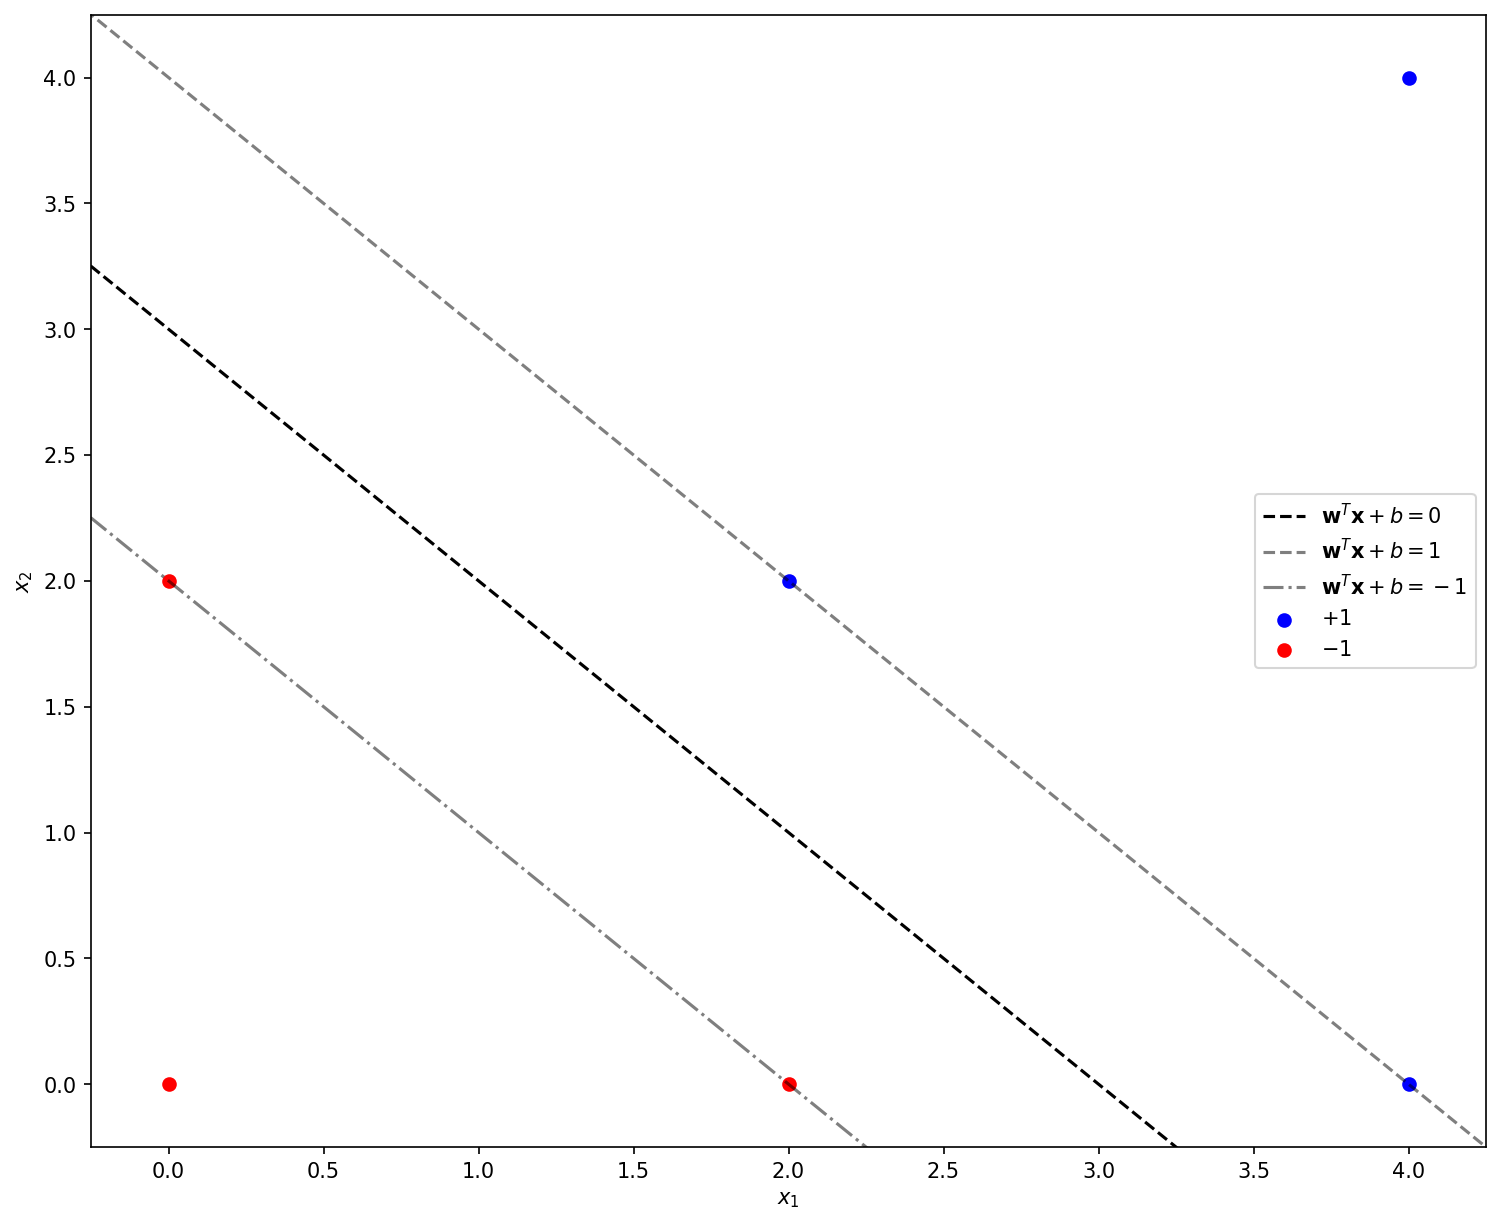

In [2]:
import numpy as np                                                                            
import matplotlib                                                                             
import matplotlib.pyplot as plt 

Xp = np.array((2,2,4,4,4,0))
Xn = np.array((0,0,2,0,0,2))
Xp = Xp.reshape((3,2))
Xn = Xn.reshape((3,2))

plt.figure(num=None, figsize=(12, 10), dpi=150)
ax = plt.axes()
plt.scatter(Xp[:,0], Xp[:,1], label='$+1$', marker='o', color='blue')
plt.scatter(Xn[:,0], Xn[:,1], label='$-1$', marker='o', color='red')
plt.plot(np.linspace(-.5,4.5),-np.linspace(-.5,4.5)+3, 'k--', label='$\mathbf{w}^T\mathbf{x} + b = 0$')
plt.plot(np.linspace(-.5,4.5),-np.linspace(-.5,4.5)+4, 'k--', alpha = 0.5, label='$\mathbf{w}^T\mathbf{x} + b= 1$')
plt.plot(np.linspace(-.5,4.5),-np.linspace(-.5,4.5)+2, 'k-.', alpha = 0.5, label='$\mathbf{w}^T\mathbf{x} + b= -1$')

plt.xlim((-.25,4.25))
plt.ylim((-.25,4.25))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend();

# Practical Question
## 4. Logistic Regression (5 pts)
### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

### About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
The dataset includes information about:
*   Customers who left within the last month – the column is called Churn.
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
*   Demographic info about customers – gender, age range, and if they have partners and dependents.
We will help you load and visualise the dataset as well as the preprocessing, you need to build up your logistic regression model step by step and do the prediction.
*   **Remember, you are not allowed to use sklearn in modelling and predicting, you have to fill your code in the skeleton.** 








In [13]:
## Load the dataset and read it
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import urllib

try:
    urllib.request.urlretrieve('https://raw.githubusercontent.com/BruceZHANG6/Imagesforuse/master/ChurnData.csv', 'ChurnData.csv')
except urllib.error.HTTPError as ex:
    print('Problem:', ex)
    
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [14]:
## Data pre-processing and selection
## Train/Test dataset split
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])
y = np.reshape(y, (np.asarray(churn_df['churn']).shape[0], 1))
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7, 160) (1, 160)
Test set: (7, 40) (1, 40)


**Hints**:
- You compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ .
- You compute activation $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$.
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$.

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

- You write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.
- In prediction, you calculate $\hat{Y} = A = \sigma(w^T X + b)$.
- You may use np.exp, np.log(), np.dot(), etc. 

In [0]:
## Modeling and predicting

# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Return: s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))        # Calculate value of sigmoid function (input should be given as np.dot(w.T,x)+b)          / Edited
    
    return s
  
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    """
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized to 0
    """    
    w = np.array([0]*dim)       # Make numpy array (so it has attribute 'shape') of zeros with shape (3,)                 / Edited
    w = w.reshape((dim,1))      # Reshape from (3,) to (3,1)                                                              / Edited
    b = 0.                      # Initialize b to 0 as floating point number                                              / Edited
   
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
  
# GRADED FUNCTION: grad_cost
def grad_cost(w, b, X, Y):
    """
    Arguments:
    X -- data of size (number of features, number of examples)
    Y -- true "label" vector

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """ 
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b)                      # Compute the activation with shape (1,m)                                                   / Edited
    cost = -1/m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))# Calculate the cost function, summing the expression for all m pairs in A and Y            / Edited          
    dw = 1/m*X@((A-Y).T)                                # Gradient w.r.t w using matrix multiplication, has size (n,1)                              / Edited
    db = 1/m*np.sum(A-Y)                                # Gradient w.r.t b, summing differences over all m pairs in A and Y, has size ()            / Edited

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

 # GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = grad_cost(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw # Update w by moving towards the direction of steepest descent (-gradient) in parameter space with a step-size scaled by the learning rate     / Edited
        b = b - learning_rate * db # Update b by moving towards the direction of steepest descent (-gradient) in parameter space with a step-size scaled by the learning rate     / Edited
        
        if i % 100 == 0:
            costs.append(cost)     
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}   
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  
# GRADED FUNCTION: predict
def predict(w, b, X):
    '''
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b)      # Using the previously defined sigmoid function                                           / Edited
    
    for i in range(A.shape[1]):
        
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0;
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
  
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    Returns: d -- dictionary containing information about the model.
    """    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])      # Use initialization function with dim=number of features               / Edited

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost) # Optimize w and b using the previously defined gradient descent function      / Edited
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
## The train accuracy and test accuracy
## Feel free to change the hyperparameters
d = model(X_train, y_train, X_test, y_test, num_iterations = 20000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.630203
Cost after iteration 200: 0.590523
Cost after iteration 300: 0.563211
Cost after iteration 400: 0.543095
Cost after iteration 500: 0.527566
Cost after iteration 600: 0.515188
Cost after iteration 700: 0.505098
Cost after iteration 800: 0.496739
Cost after iteration 900: 0.489725
Cost after iteration 1000: 0.483781
Cost after iteration 1100: 0.478702
Cost after iteration 1200: 0.474330
Cost after iteration 1300: 0.470543
Cost after iteration 1400: 0.467245
Cost after iteration 1500: 0.464357
Cost after iteration 1600: 0.461818
Cost after iteration 1700: 0.459574
Cost after iteration 1800: 0.457585
Cost after iteration 1900: 0.455815
Cost after iteration 2000: 0.454234
Cost after iteration 2100: 0.452818
Cost after iteration 2200: 0.451546
Cost after iteration 2300: 0.450401
Cost after iteration 2400: 0.449367
Cost after iteration 2500: 0.448431
Cost after iteration 2600: 0.447583
Cost after iteration 2700: 0.446812
Cost